In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 
# Sample data 
data = { 
'long_hair': [1,0,1,0,1,0,0,1], 
'forehead_width_cm': [6.5,6.0,5.8,5.5,6.2,5.7,5.9,6.1], 
'gender': ['Female','Male','Female','Male','Female','Male','Male','Female'] 
} 
df = pd.DataFrame(data) 
X = df[['long_hair','forehead_width_cm']] 
y = df['gender'] 
# Split train-test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
random_state=1) 
# Train model 
model = GaussianNB() 
model.fit(X_train, y_train) 
# Predict 
y_pred = model.predict(X_test) 
print("Predictions:", y_pred) 
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Predictions: ['Female' 'Female' 'Male']
Accuracy: 1.0


In [2]:
import numpy as np 
from sklearn.linear_model import LinearRegression 
X = np.array([[2],[4],[6],[8]])  # Hours studied 
y = np.array([20,40,60,80])      
# Marks 
model = LinearRegression() 
model.fit(X, y) 
# Predict marks for 5 hours 
pred = model.predict([[5]]) 
print("Predicted marks for 5 hours:", pred[0]) 

Predicted marks for 5 hours: 50.0


In [3]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
iris = load_iris() 
X, y = iris.data, iris.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=0) 
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.9666666666666667


In [4]:
from sklearn.tree import DecisionTreeClassifier 
# Features: [Weight, Texture(1=Smooth, 0=Rough)] 
X = [[140,1],[130,1],[150,0],[170,0]] 
y = ['Apple','Apple','Orange','Orange'] 
model = DecisionTreeClassifier() 
model.fit(X, y) 
pred = model.predict([[145,1]]) 
print("Prediction:", pred[0])

Prediction: Apple


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

Cluster Centers:
 [[46.66666667 43.33333333]
 [80.         86.66666667]]
Labels: [1 0 1 0 0 1]


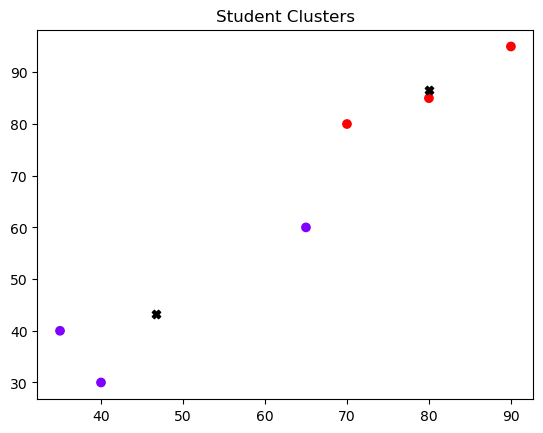

In [5]:
import numpy as np 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
X = np.array([[70,80],[65,60],[90,95],[40,30],[35,40],[80,85]]) 
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X) 
print("Cluster Centers:\n", kmeans.cluster_centers_) 
print("Labels:", kmeans.labels_) 
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
color='black', marker='X') 
plt.title("Student Clusters") 
plt.show()

In [6]:
import numpy as np 
from sklearn.linear_model import LogisticRegression 
X = np.array([[1],[2],[3],[4],[5],[6],[7],[8]]) 
y = np.array([0,0,0,0,1,1,1,1])  # 1=Pass, 0=Fail 
model = LogisticRegression() 
model.fit(X, y) 
print("Predicted (5 hours):", model.predict([[5]])[0]) 
print("Predicted (2 hours):", model.predict([[2]])[0]) 

Predicted (5 hours): 1
Predicted (2 hours): 0


In [7]:
from sklearn import svm 
X = [[1,2],[2,3],[3,3],[6,5],[7,7],[8,6]] 
y = [0,0,0,1,1,1] 
clf = svm.SVC(kernel='linear') 
clf.fit(X, y) 
print("Predict [4,4]:", clf.predict([[4,4]])[0])

Predict [4,4]: 0


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score 
y_true = [1,0,1,1,0,1] 
y_pred = [1,0,0,1,1,1] 
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred)) 
print("Accuracy:", accuracy_score(y_true, y_pred)) 

Confusion Matrix:
 [[1 1]
 [1 3]]
Accuracy: 0.6666666666666666


In [10]:
import heapq

def huffman(text):
    freq = {c: text.count(c) for c in set(text)}
    heap = [[f, [c, ""]] for c, f in freq.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for p in lo[1:]:
            p[1] = '0' + p[1]
        for p in hi[1:]:
            p[1] = '1' + p[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heapq.heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

text = "HELLO"
codes = huffman(text)
print("Huffman Codes:", codes)


Huffman Codes: [['L', '0'], ['O', '10'], ['E', '110'], ['H', '111']]


In [12]:
def lcs(a, b):
    m, n = len(a), len(b)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(m):
        for j in range(n):
            if a[i] == b[j]:
                dp[i + 1][j + 1] = dp[i][j] + 1
            else:
                dp[i + 1][j + 1] = max(dp[i][j + 1], dp[i + 1][j])
    return dp[m][n]

print("LCS length:", lcs("ACGTGCA", "GTCGACG"))


LCS length: 4


In [13]:
import math

cities = [(0, 0), (2, 3), (5, 4), (1, 1)]
visited = [0]
total = 0

while len(visited) < len(cities):
    last = visited[-1]
    next_city = min(
        [i for i in range(len(cities)) if i not in visited],
        key=lambda i: math.dist(cities[last], cities[i])
    )
    total += math.dist(cities[last], cities[next_city])
    visited.append(next_city)

total += math.dist(cities[visited[-1]], cities[0])

print("Path:", visited)
print("Distance:", round(total, 2))


Path: [0, 3, 1, 2]
Distance: 13.22


In [14]:
import random

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + mid + quicksort(right)

data = [10, 7, 8, 9, 1, 5]
print("Original:", data)
print("Sorted:", quicksort(data))


Original: [10, 7, 8, 9, 1, 5]
Sorted: [1, 5, 7, 8, 9, 10]


In [15]:
class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [[] for _ in range(size)]

    def insert(self, key):
        self.table[key % self.size].append(key)

    def display(self):
        for i, b in enumerate(self.table):
            print(i, ":", b)

h = HashTable(5)
for k in [10, 15, 20, 25, 30]:
    h.insert(k)
h.display()


0 : [10, 15, 20, 25, 30]
1 : []
2 : []
3 : []
4 : []
